In [91]:
# importing libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
wine_data = fetch_openml(name='wine_quality', version=1)

x = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.to_numeric(wine_data.target)
y = y.apply(lambda y_value: 1 if y_value >= 7 else 0)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


EDA - identifying patterns and missing data.

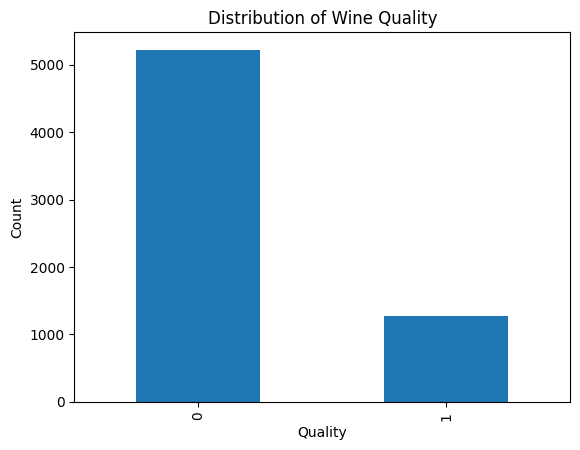

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [92]:
# Target/predicts are in scattered in different ratings , datatype = int64
y.value_counts()
y.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

# No missing data found
x.head()
x.isnull().sum().sum()
x.isnull().sum()

# Every columns contains Numeric data , no need of encoding.
x.head()

In [93]:
# Dividing dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [94]:
#  Importing RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=100)


lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)

print("accuracy score :" , acc)

accuracy score : 0.8892307692307693
